<a href="https://colab.research.google.com/github/Adarshkumar61/Deep_Learning_using_colab/blob/main/Image_Recognition_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']



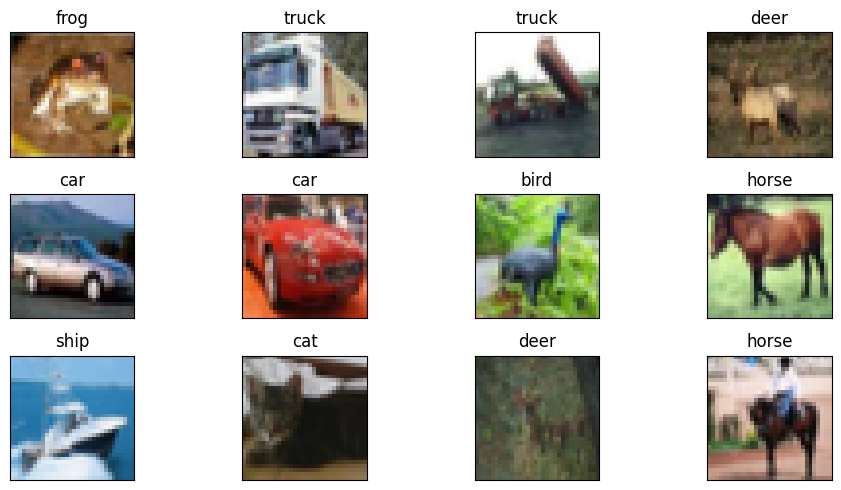

In [5]:
plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)
    plt.imshow(x_train[i])
    label_index = y_train[i][0]  # y_train is shape (n, 1)
    plt.title(class_names[label_index])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.3610 - loss: 1.7321 - val_accuracy: 0.5567 - val_loss: 1.2526
313/313 - 3s - 10ms/step - accuracy: 0.5567 - loss: 1.2526

Test accuracy: 0.56
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


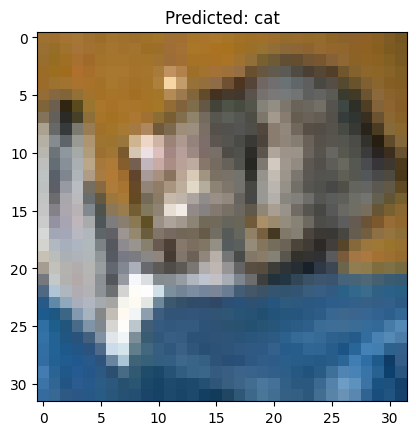

In [6]:

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output classes
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

# Make a prediction
import numpy as np
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[0])

# Show result
plt.imshow(x_test[0])
plt.title(f"Predicted: {class_names[predicted_label]}")
plt.show()
